## Model Building for Regression

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv(r"D:\Innomatics\DataScience\Machine_Learning_(ML)\Projects\Model_building_for_Regression\src\mtcars.xlsx - mtcars.csv")

In [4]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
## Checking for missing values

In [5]:
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [10]:
## Checking the data types

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [11]:
## Finding the outliers

In [8]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,261.971875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,249.353425,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,1472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [14]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


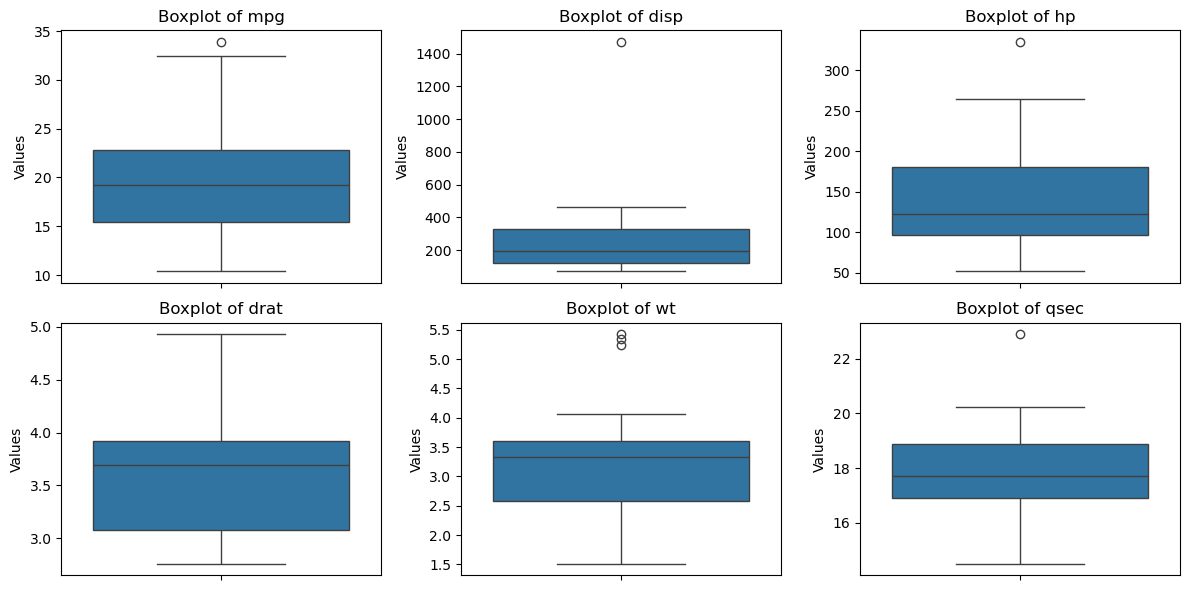

In [15]:
continuous_cols = ["mpg","disp","hp","drat","wt","qsec"]
plt.figure(figsize=(12,6))
for i,col in enumerate(continuous_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Values")
plt.tight_layout()
plt.show()

In [23]:
## From the data - our Dependent feature is "mpg", So imputing only the X features

In [28]:
outliers = {}.fromkeys(df["wt"] > 3.21)
outliers

{False: None, True: None}

In [33]:
## Impute Outiers

def impute_outliers(dataframe,column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    Upper_bound = Q3 + 1.5 * IQR
    ## Imputing
    outliers = df[df[column] > Upper_bound][column]
    replace_outliers = {}.fromkeys(outliers,Upper_bound)
    df[column] = df[column].replace(replace_outliers)
    print(f"Outliers - {outliers} replaced with {Upper_bound}")

    return dataframe

In [35]:
for i in continuous_cols:
    impute_outliers(df,i)

Outliers - 19    33.9
Name: mpg, dtype: float64 replaced with 33.8625
Outliers - Series([], Name: disp, dtype: float64) replaced with 633.7625
Outliers - 30    335
Name: hp, dtype: int64 replaced with 305.25
Outliers - Series([], Name: drat, dtype: float64) replaced with 5.18
Outliers - 14    5.250
15    5.424
16    5.345
Name: wt, dtype: float64 replaced with 5.153125
Outliers - 8    22.9
Name: qsec, dtype: float64 replaced with 21.91125


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

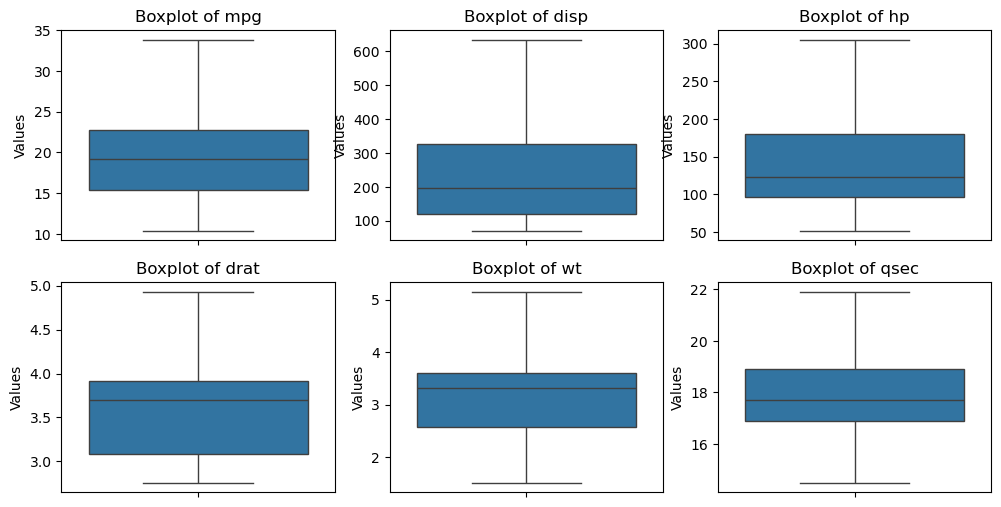

In [36]:
plt.figure(figsize=(12,6))
for i,col in enumerate(continuous_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Values")
plt.tight_layout

In [49]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2


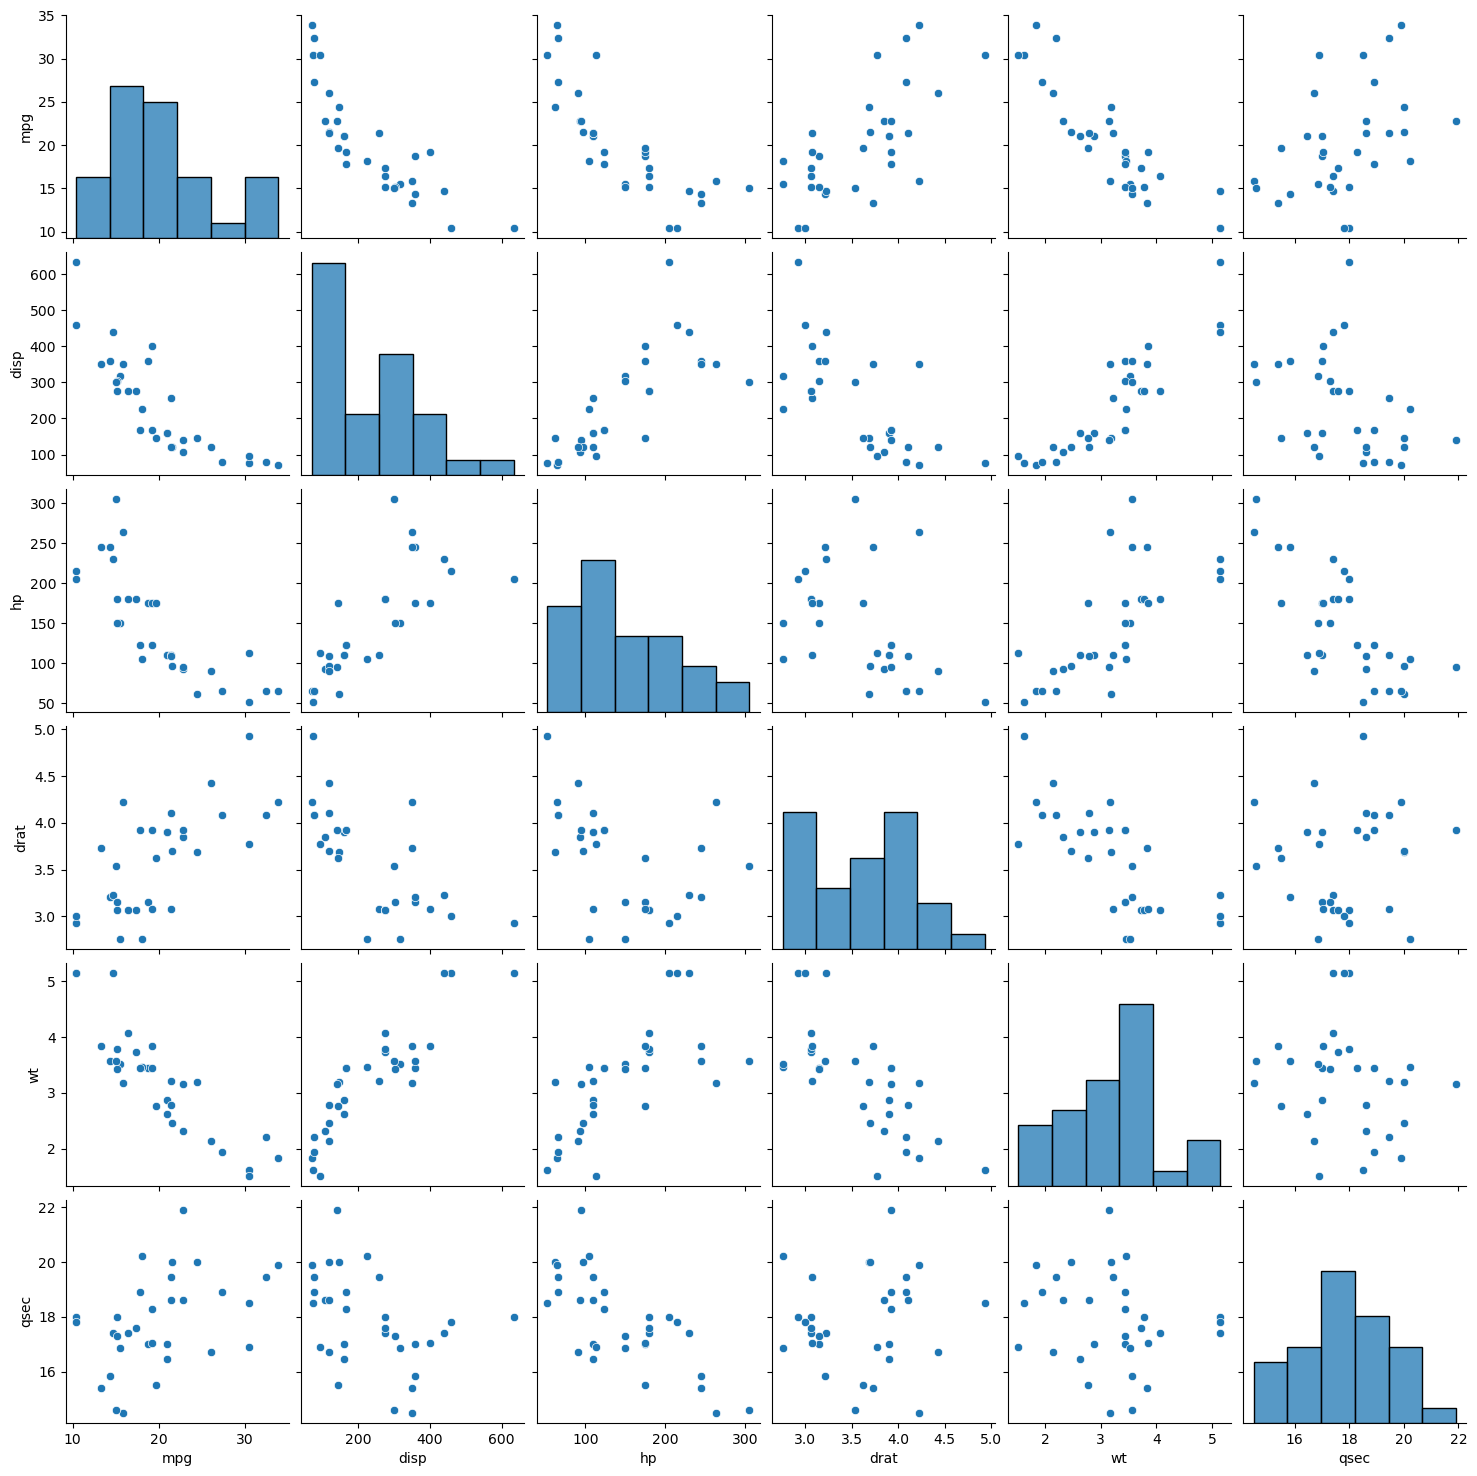

In [51]:
sns.pairplot(df,vars=["mpg","disp","hp","drat","wt","qsec"])
plt.show()

In [60]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852308,-0.829731,-0.793137,0.681251,-0.877231,0.430759,0.664120,0.599869,0.480420,-0.550953
cyl,-0.852308,1.000000,0.856344,0.848936,-0.699938,0.795149,-0.597313,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.829731,0.856344,1.000000,0.770566,-0.691322,0.885722,-0.396448,-0.677056,-0.566965,-0.539135,0.386069
hp,-0.793137,0.848936,0.770566,1.000000,-0.464057,0.684969,-0.728759,-0.737616,-0.269607,-0.156253,0.731299
drat,0.681251,-0.699938,-0.691322,-0.464057,1.000000,-0.722676,0.084352,0.440278,0.712711,0.699610,-0.090790
wt,-0.877231,0.795149,0.885722,0.684969,-0.722676,1.000000,-0.188267,-0.561040,-0.705306,-0.589351,0.431051
qsec,0.430759,-0.597313,-0.396448,-0.728759,0.084352,-0.188267,1.000000,0.760164,-0.225893,-0.231047,-0.679025
vs,0.664120,-0.810812,-0.677056,-0.737616,0.440278,-0.561040,0.760164,1.000000,0.168345,0.206023,-0.569607
am,0.599869,-0.522607,-0.566965,-0.269607,0.712711,-0.705306,-0.225893,0.168345,1.000000,0.794059,0.057534
gear,0.480420,-0.492687,-0.539135,-0.156253,0.699610,-0.589351,-0.231047,0.206023,0.794059,1.000000,0.274073


## Spliting train and test data

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
X = df.drop("mpg",axis = 1)
y = df["mpg"]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25, 10), (7, 10), (25,), (7,))

## Scaling

In [44]:
sc = StandardScaler()

In [45]:
X_trian = sc.fit_transform(X_train)

In [46]:
X_test = sc.transform(X_test)

## Building model

In [62]:
from sklearn.model_selection import LinearRegrssion

ImportError: cannot import name 'LinearRegrssion' from 'sklearn.model_selection' (D:\Data_Softwares\Lib\site-packages\sklearn\model_selection\__init__.py)